In [1]:
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import umap
import sys
import utilities as ut
from Network import Net
import Network as nn

In [2]:
path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-1.csv'
path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-1.csv'


lc_test = pd.read_table(path_test, sep= ',')
lc_test = lc_test[lc_test.label=='ClassA']
lc_train = pd.read_table(path_train, sep= ',')
lc_train = lc_train[lc_train.label=='ClassA']

In [3]:
lc_train['label'].value_counts()

ClassA    28847
Name: label, dtype: int64

In [4]:
example_test  = lc_test['ID'].sample(10)
example_train = lc_train['ID'].sample(10)

In [5]:
import seaborn as sns
sns.set_theme(style="white")


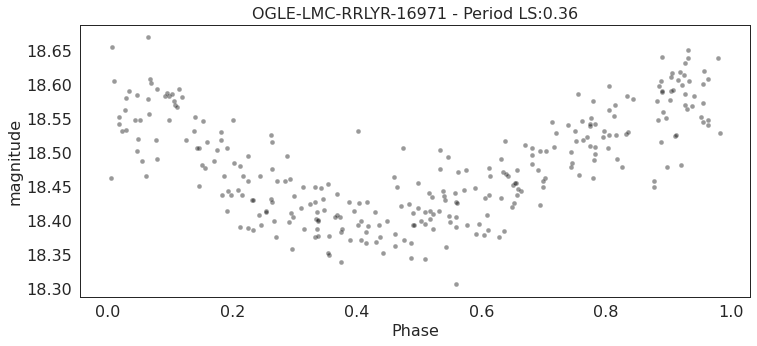

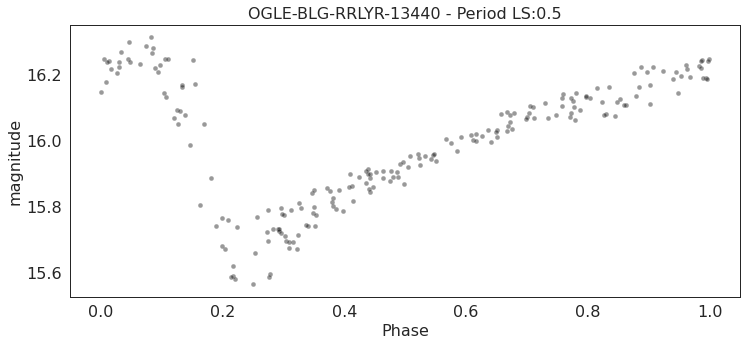

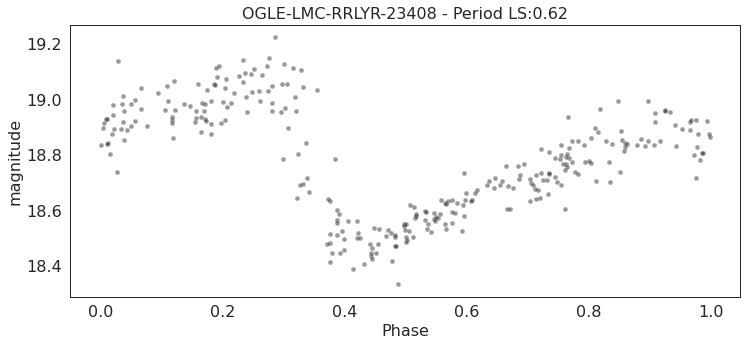

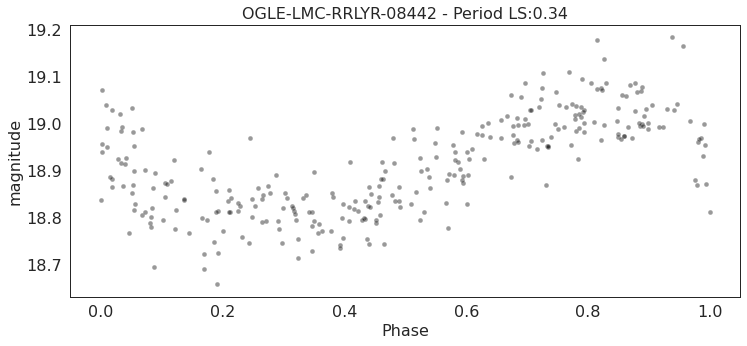

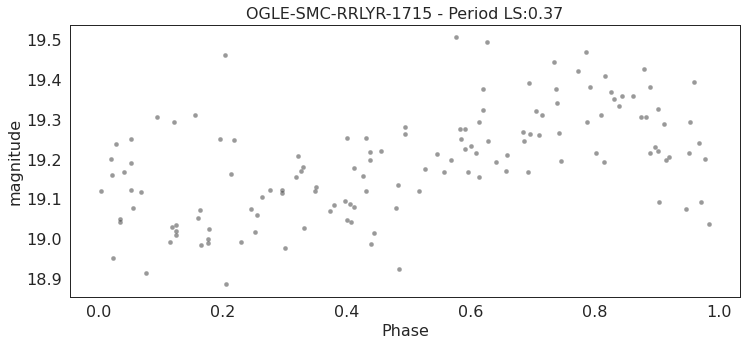

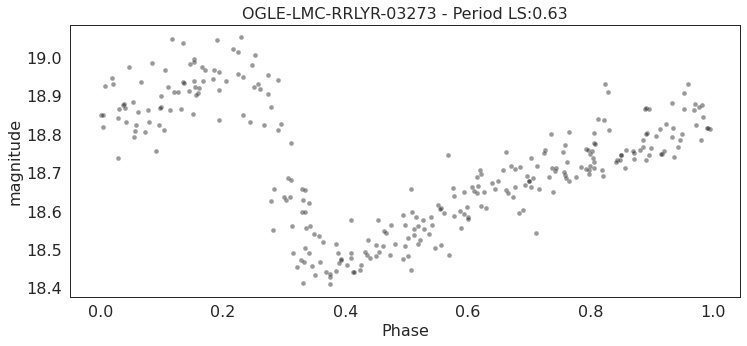

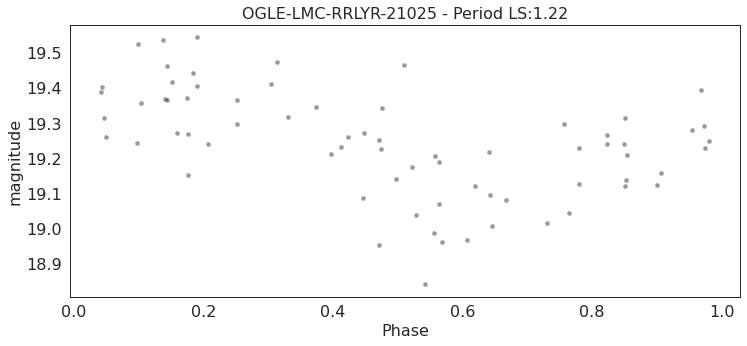

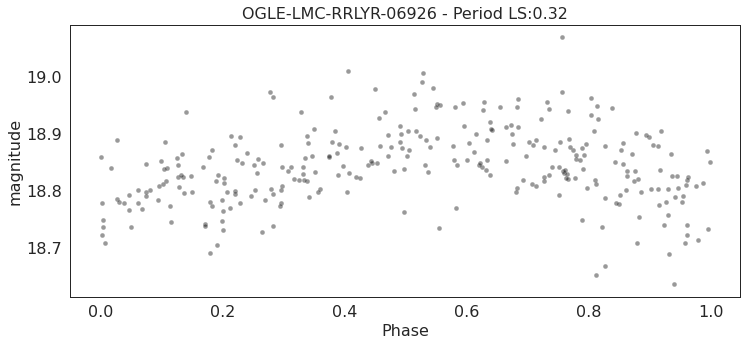

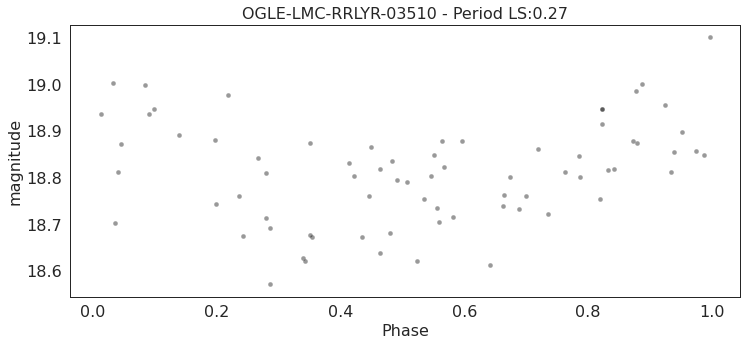

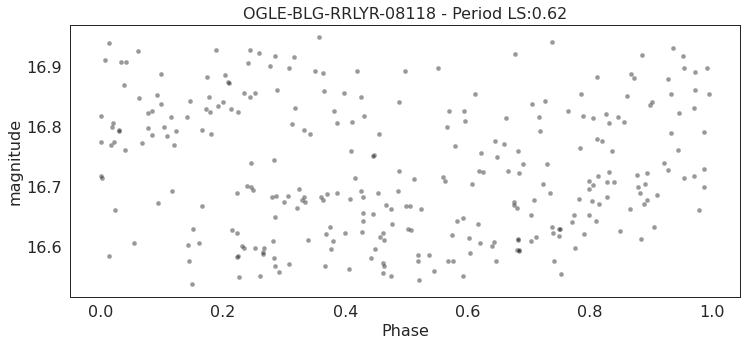

In [56]:
for lc in example_test.unique():
    new_test = lc_test[lc_test.ID==lc].ID.str.split("-", n = 3, expand = True)
    period = lc_test[lc_test.ID==lc].PeriodLS.values[0]
    field = new_test[new_test.columns[1]].values[0].lower()
    lcu = pd.read_table('/home/franciscoperez/Desktop/Code/FATS/LCsOGLE/data/'+field+'/rrlyr/phot/I/'+lc,sep=" ", names=['time', 'magnitude', 'error'])
    #print(lc)
    t0 = lcu.time.min()
    lcu['Phase'] = ((lcu.time-t0)/period)%1 
    sample = 300
    if lcu.dropna().shape[0]<300: 
        sample=lcu.dropna().shape[0]
    plt.subplots(figsize=(12, 5))
    sns.scatterplot(x="Phase", y="magnitude",
             data=lcu.dropna().sample(sample), alpha =0.4, color='black')
    plt.title(lc.replace('.dat', '')+' - Period LS:' + str(np.round(period,2)))
    plt.show()
    
    

OGLE-LMC-RRLYR-18487.dat


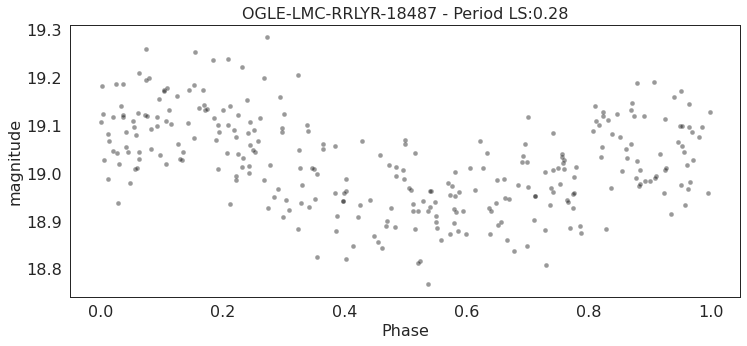

OGLE-LMC-RRLYR-10742.dat


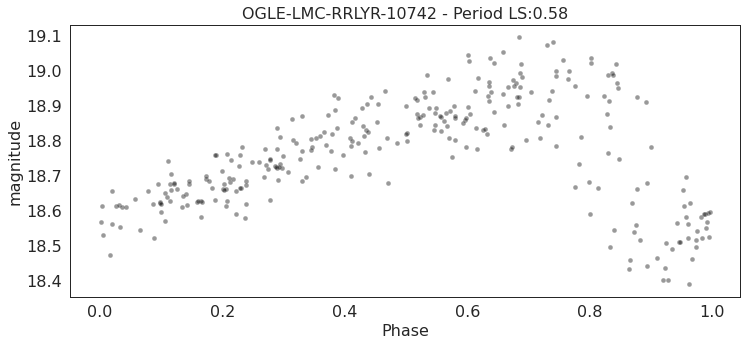

OGLE-BLG-RRLYR-01978.dat


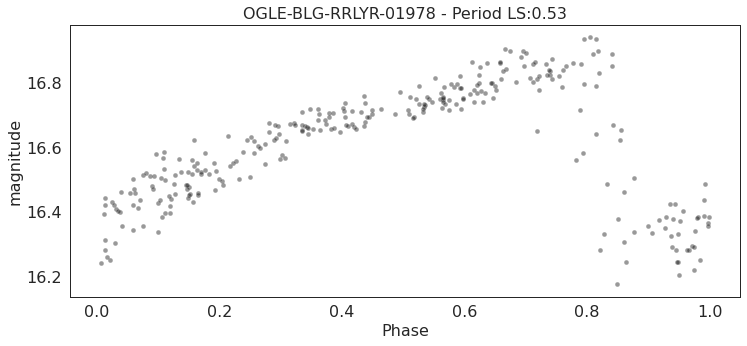

OGLE-LMC-RRLYR-03734.dat


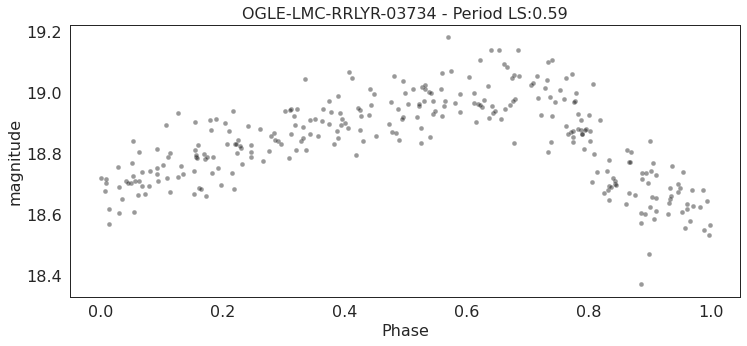

OGLE-BLG-RRLYR-06039.dat


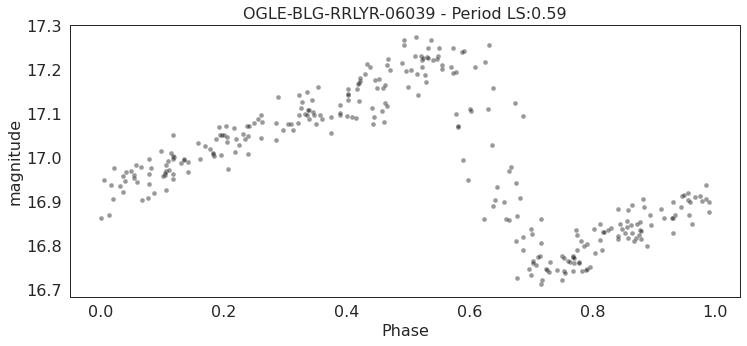

OGLE-LMC-RRLYR-16873.dat


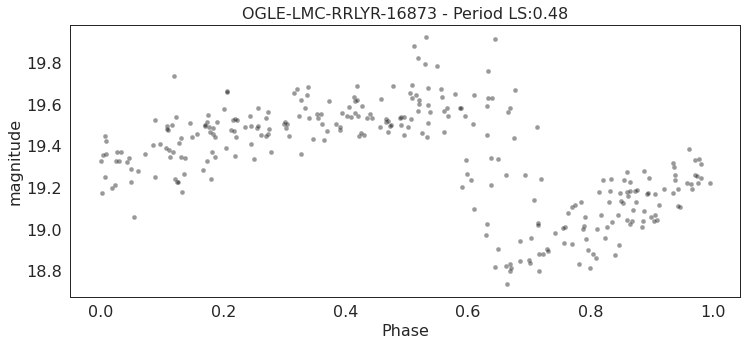

OGLE-LMC-RRLYR-02931.dat


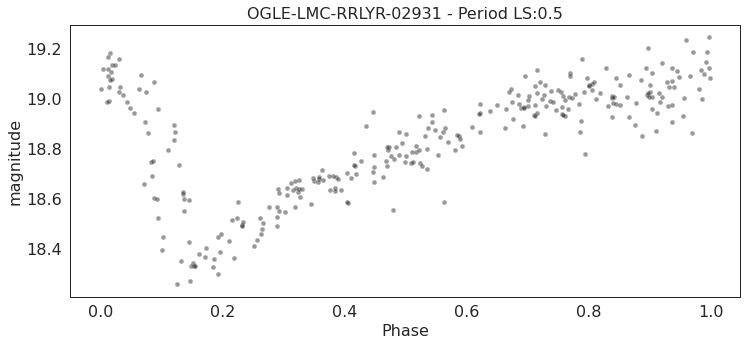

OGLE-LMC-RRLYR-17889.dat


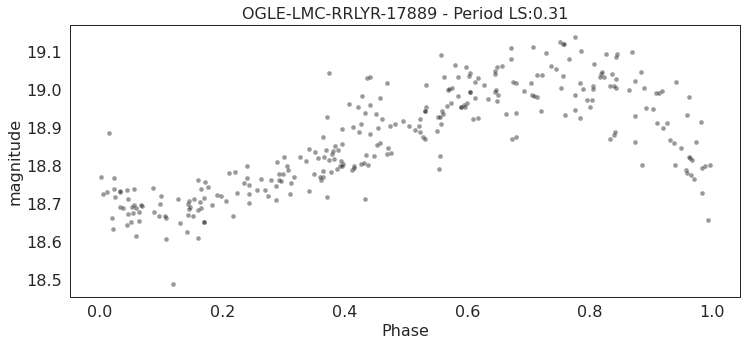

OGLE-LMC-RRLYR-23758.dat


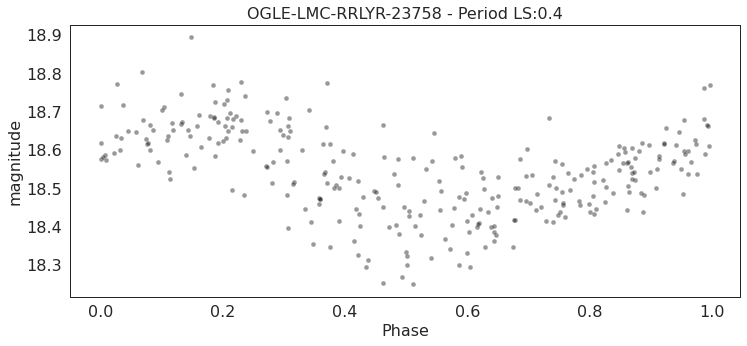

OGLE-BLG-RRLYR-15663.dat


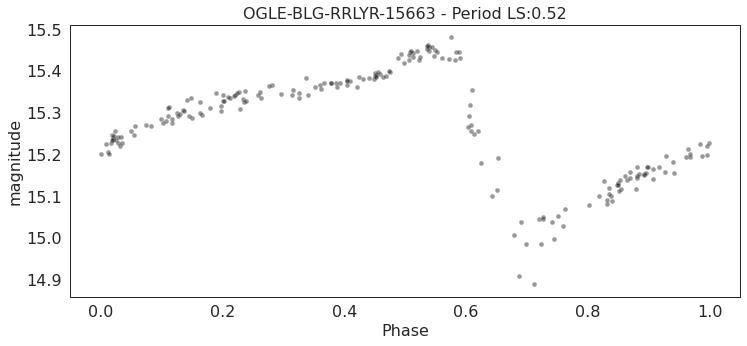

In [57]:
 for lc in example_train.unique():
    
    print(lc)
    new_train = lc_train[lc_train.ID==lc].ID.str.split("-", n = 3, expand = True)
    #print(new_train)
    period = lc_train[lc_train.ID==lc].PeriodLS.values[0]
    field = new_train[new_train.columns[1]].values[0].lower()
    lcu = pd.read_table('/home/franciscoperez/Desktop/Code/FATS/LCsOGLE/data/'+field+'/rrlyr/phot/I/'+lc,sep=" ", names=['time', 'magnitude', 'error'])
    #print(lc)
    t0 = lcu.time.min()
    lcu['Phase'] = ((lcu.time-t0)/period)%1 
    sample = 300
    if lcu.dropna().shape[0]<300: 
        sample=lcu.dropna().shape[0]
    plt.subplots(figsize=(12, 5))
    sns.scatterplot(x="Phase", y="magnitude",
             data=lcu.dropna().sample(sample), alpha =0.4, color='black')
    plt.title(lc.replace('.dat', '')+' - Period LS:' + str(np.round(period,2)))
    plt.show()
    
    


In [8]:
train_dataset, test_dataset = ut.load_files(dataset=1)


Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0


In [9]:
train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

(306844, 61)
(28625, 60)
(28625, 61)


In [58]:
train_dataset.columns

Index(['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
       'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',
       'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq3_harmonics_re

In [10]:
data_total = pd.concat([train_dataset, test_dataset])
y = data_total['label']
del data_total['label']

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total, y, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier

feature_names = [data_total.columns[i] for i in range(data_total.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


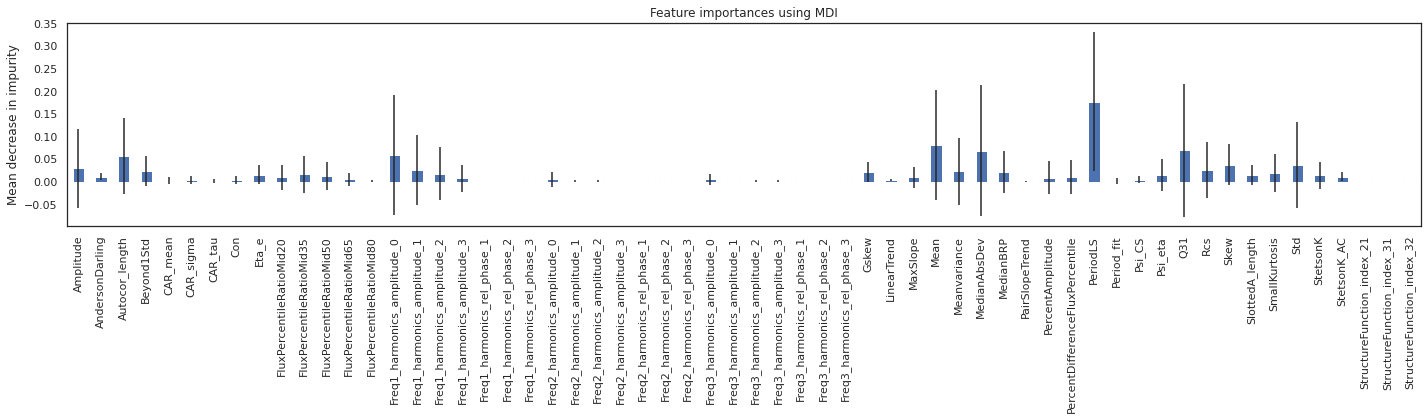

In [13]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(20, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [14]:
selected_features = ['PeriodLS', 'Amplitude', 'MedianAbsDev', 'Q31', 'Mean', 'Std', 'Freq1_harmonics_amplitude_0']

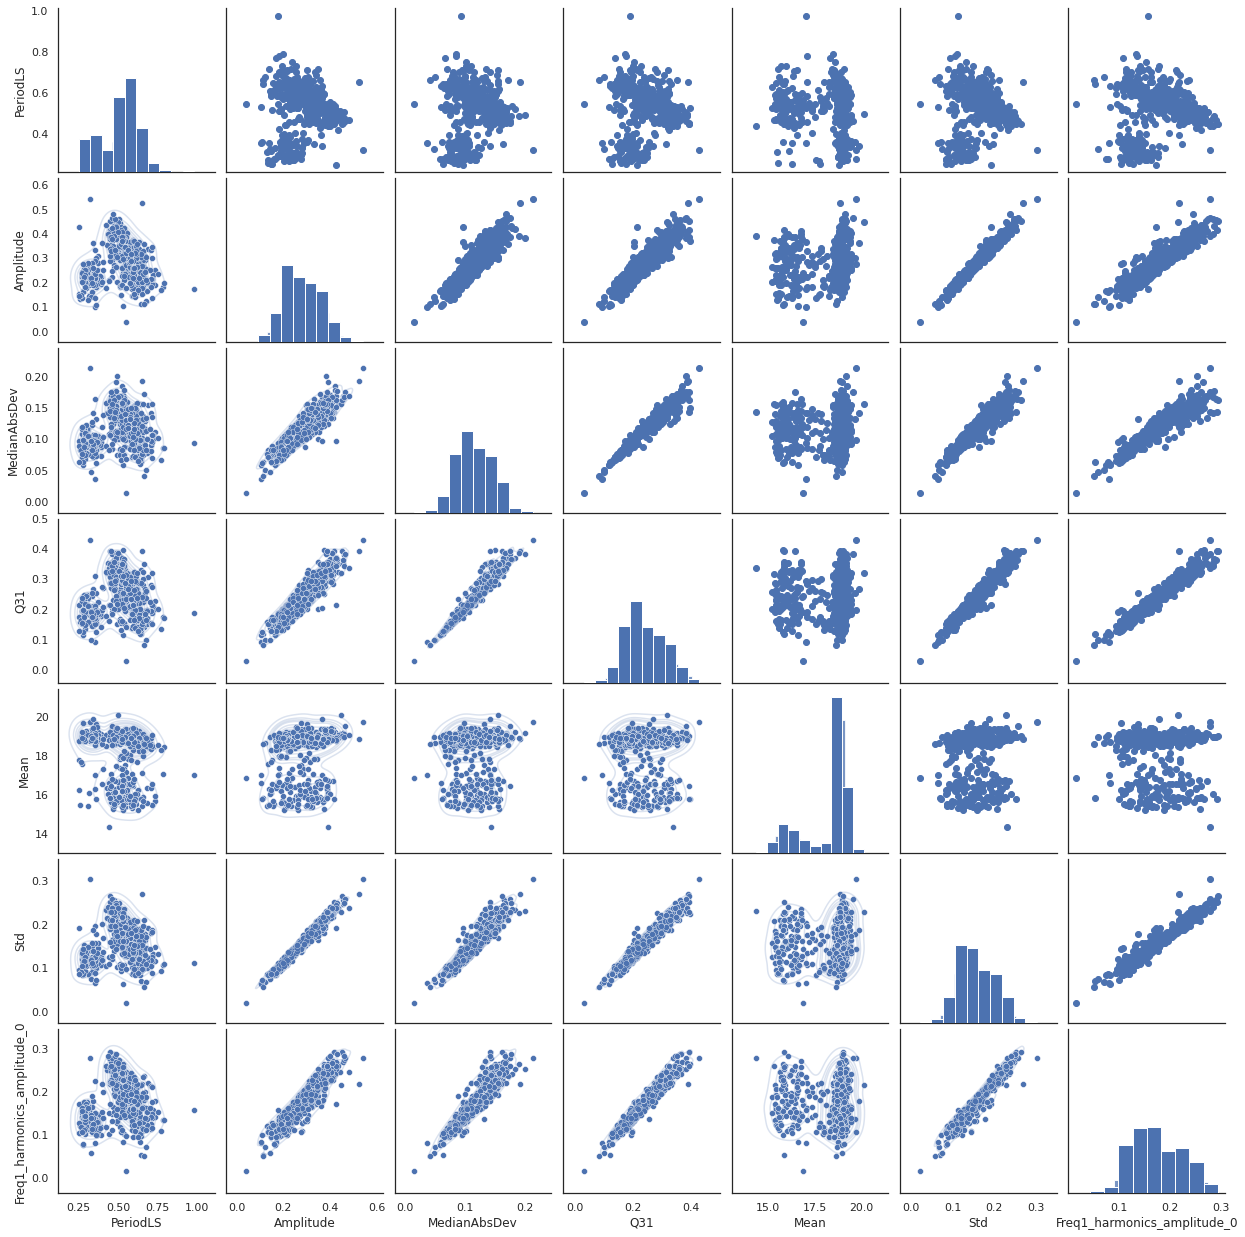

In [15]:
d_train = train_dataset[(train_dataset.label=='ClassA') & (train_dataset.PeriodLS<5)][selected_features].sample(500)
G =sns.pairplot(d_train)
G.map_diag(plt.hist)
G.map_upper(plt.scatter)
G.map_lower(sns.kdeplot, alpha=0.2)

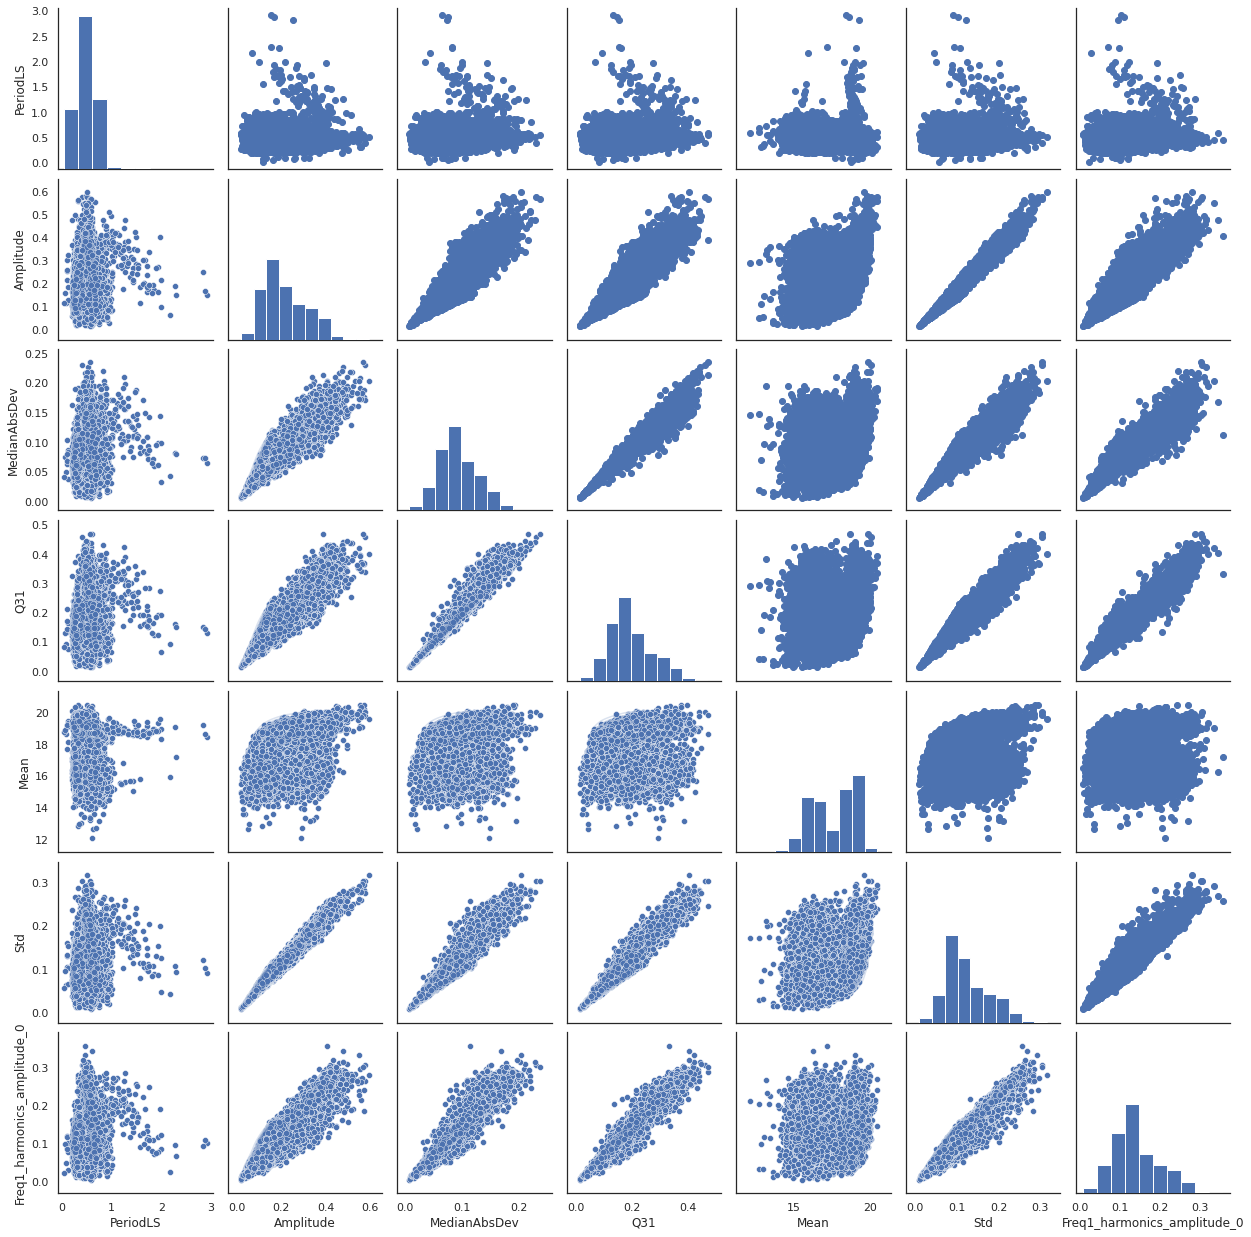

In [16]:
d_test = test_dataset[(test_dataset.label=='ClassA')& (test_dataset.PeriodLS<5)][selected_features]
G= sns.pairplot(d_test)
G.map_diag(plt.hist)
G.map_upper(plt.scatter)
G.map_lower(sns.kdeplot, alpha=0.2)

In [38]:
d_train = train_dataset[(train_dataset.label=='ClassA') & (train_dataset.PeriodLS<1.5)][selected_features].sample(1000)
d_test = test_dataset[(test_dataset.label=='ClassA')& (test_dataset.PeriodLS<1.5)][selected_features].sample(1000)
d_train['set'] = 'RR Lyrae training set'
d_test['set'] = 'RR Lyrae testing set'

In [39]:
data_final = pd.concat([d_train, d_test])

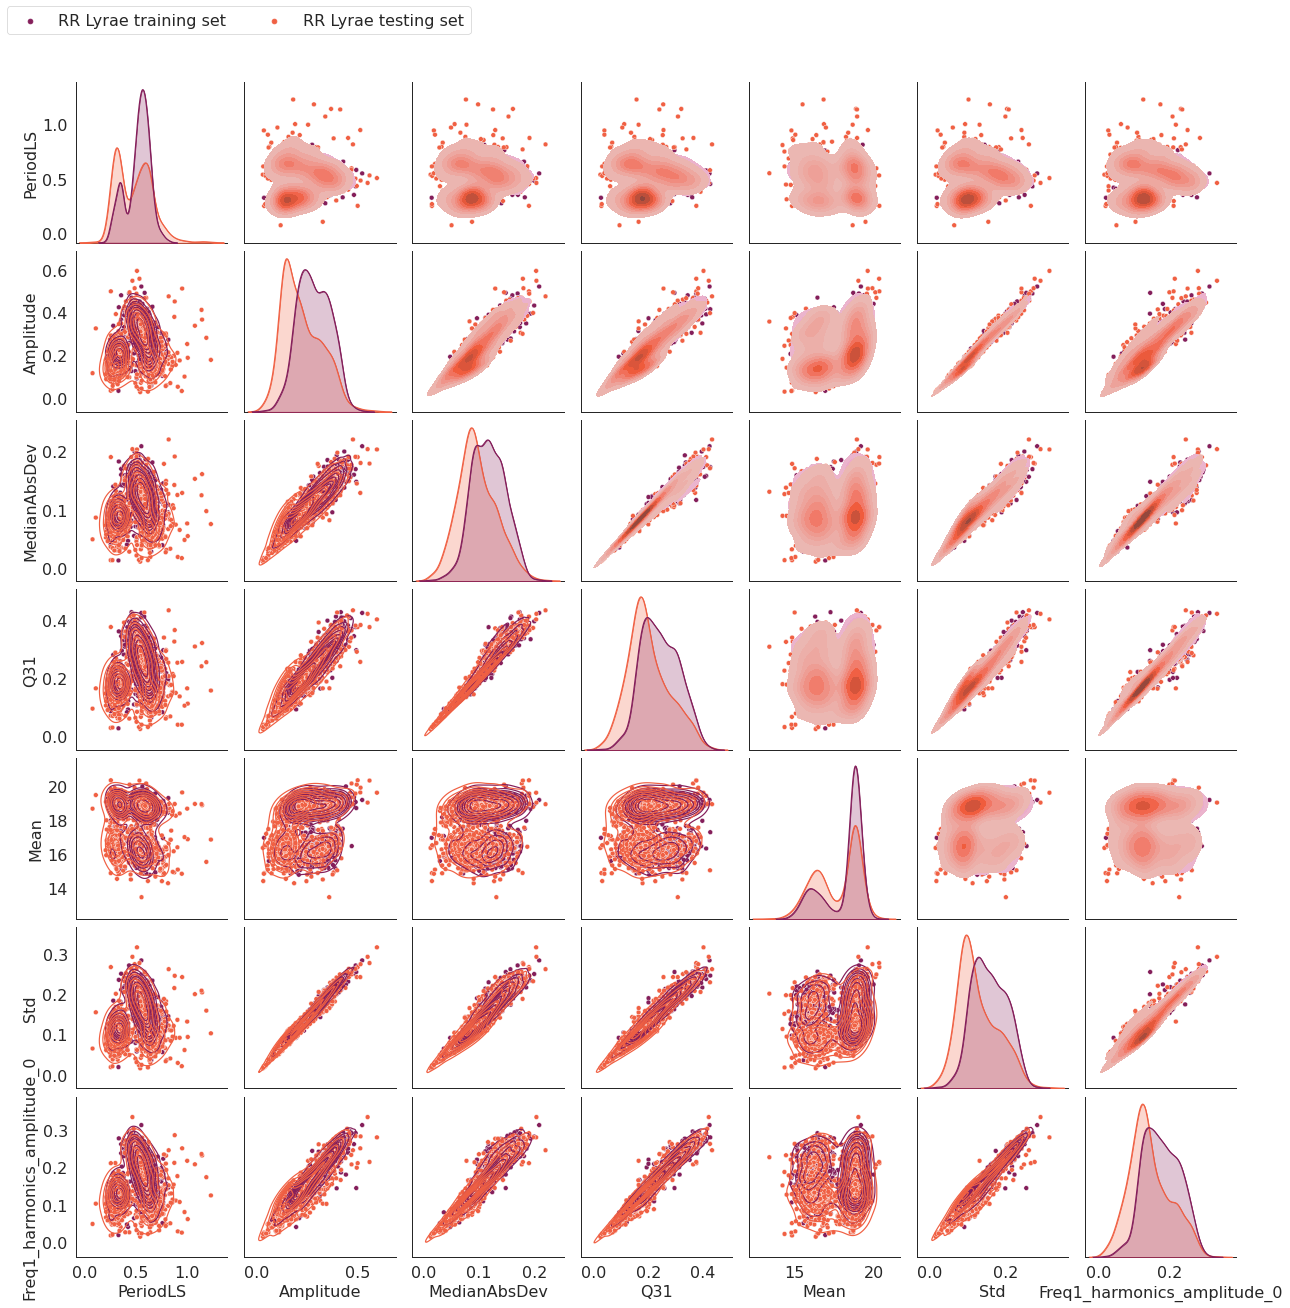

In [44]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":16, "font_scale":1.25, "axes.titlesize":16,"axes.labelsize":16,
                "xtick.labelsize":16, "ytick.labelsize":16, "legend.fontsize":16, "legend.title_fontsize": 16, 
                            "legend.loc": 'upper center', "alpha":0.2}) 
G= sns.pairplot(data_final, hue='set', palette='rocket')
G._legend.remove()
G.map_diag(sns.kdeplot)
G.map_upper(sns.kdeplot, shade =True)
G.map_lower(sns.kdeplot, shade =False)
handles = G._legend_data.values()
labels = G._legend_data.keys()
G.fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=2)
plt.show()

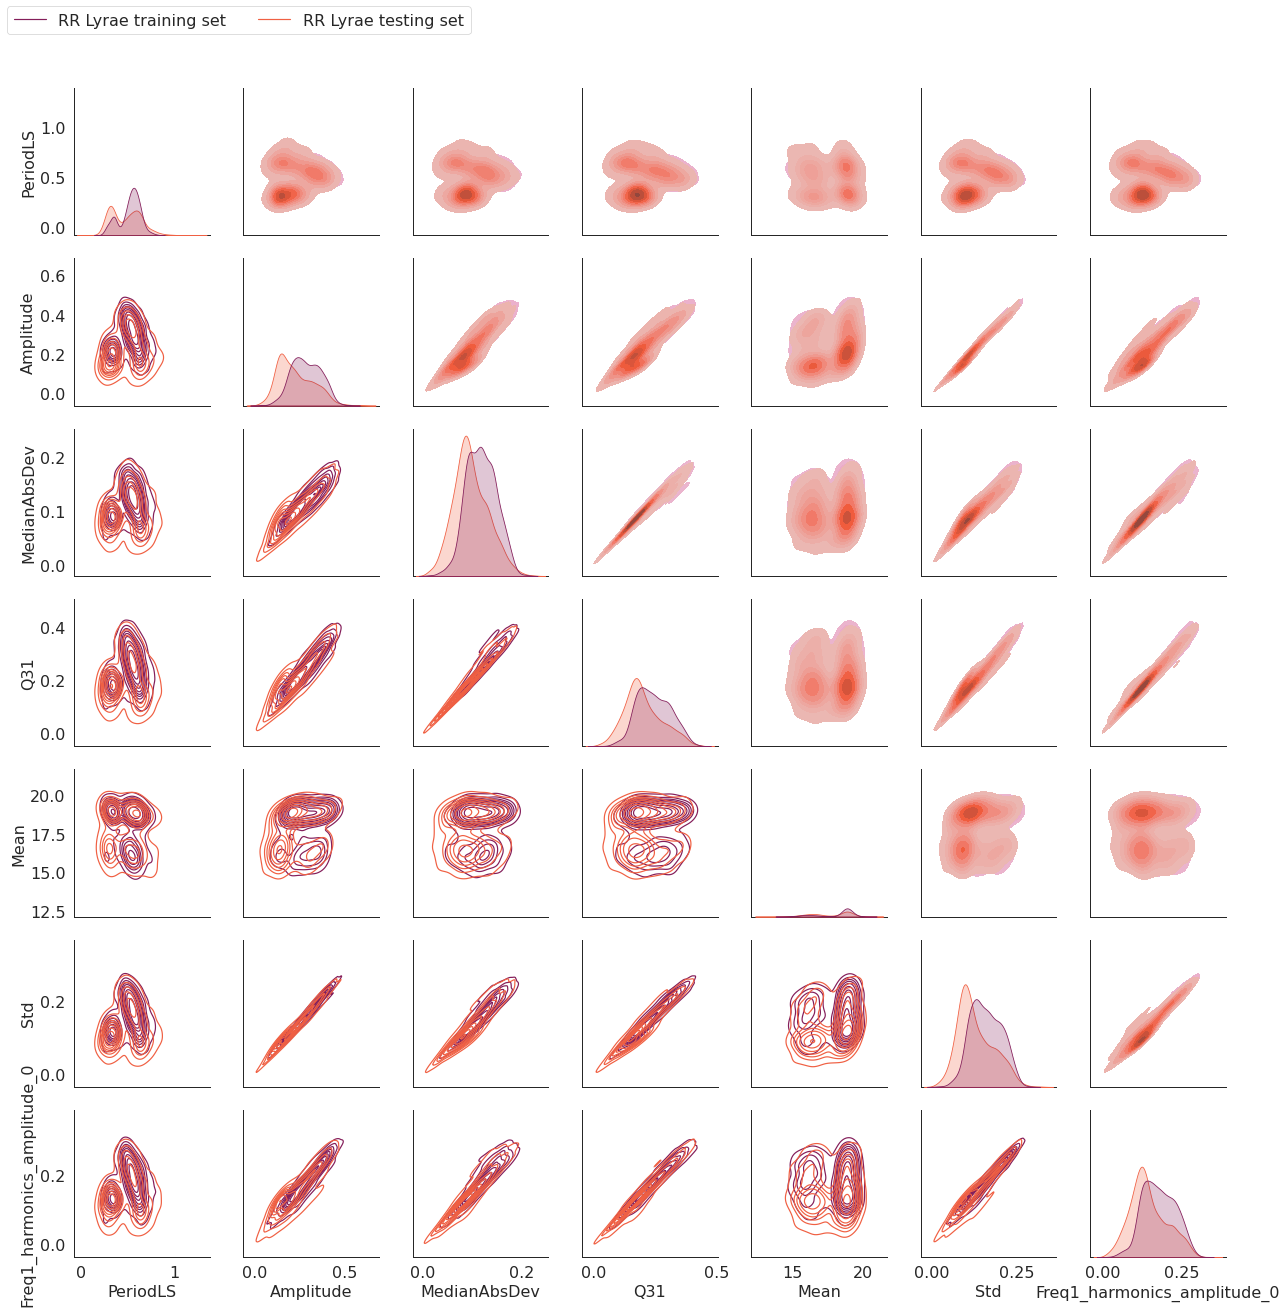

In [53]:
g = sns.PairGrid(data_final, hue='set', palette='rocket')
g.map_diag(sns.kdeplot,  shade=True)
g.map_upper(sns.kdeplot, shade=True)
g.map_lower(sns.kdeplot)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=2)

In [73]:
path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-1.csv'
path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-1.csv'


lc_test = pd.read_table(path_test, sep= ',')
lc_train = pd.read_table(path_train, sep= ',')
lc_test['label'] = lc_test['ID']
lc_train['label'] = lc_train['ID']


lc_train =  lc_train.drop(['Pred', 'Pred2', 'h', 'e', 'u','ID'], axis = 1)
for col in lc_train.columns:
    if col not in ['label']:
        if lc_train[col].var()==0:
            print(col)
lc_train = lc_train[list(lc_train.columns)]
        
lc_test =  lc_test.drop(['Pred', 'Pred2', 'h', 'e', 'u','ID'], axis = 1)
for col in lc_test.columns:
    if col not in ['label']:
        if lc_test[col].var()==0:
            print(col)
lc_test = lc_test[list(lc_test.columns)]

        
train_dataset, test_dataset = ut.delete_outliers(lc_test, lc_train)
train_dataset

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
(0, 65)
(391501, 64)
(391501, 65)


,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,label


In [74]:
lc_test

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Con,Eta_e,...,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,StructureFunction_index_21,StructureFunction_index_31,StructureFunction_index_32,label
0,296901,0.16100,0.000000,1,0.240000,77.558585,0.292725,0.230763,0.000000,5.837626,...,0.980832,1.91386,0.046331,0.094427,0.794018,0.894734,1.739593,2.376014,1.494302,OGLE-SMC-ECL-5090.dat
1,368763,0.26800,0.001824,1,0.390000,28.155410,0.280947,0.598699,0.000000,35.864526,...,-0.158562,0.90495,-1.056942,0.153150,0.865257,0.851683,1.684192,2.277850,1.518742,OGLE-BLG-RRLYR-09882.dat
2,342181,0.17475,0.000015,1,0.397436,30.003530,0.760111,0.573806,0.000000,790.838505,...,-0.481044,1.03952,-1.018995,0.112893,0.864108,0.857183,1.515414,1.841440,1.269129,OGLE-SMC-CEP-0207.dat
3,420987,0.09650,0.000000,8,0.360000,64.840662,0.908576,0.245907,0.003356,1.111892,...,0.319919,0.24904,-1.004237,0.060831,0.900128,0.830967,1.988915,2.979767,1.524583,OGLE-GD-ECL-02414.dat
4,197990,0.08900,0.000142,1,0.270000,29.368666,0.688112,0.619007,0.000000,22.049121,...,0.495130,1.94829,0.406577,0.042609,0.794706,0.802982,1.766146,2.378542,1.392667,OGLE-LMC-ECL-00388.dat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28620,188027,0.22550,0.000000,1,0.216667,100.713905,0.336455,0.191094,0.003356,14.023381,...,1.004444,1.86178,1.529545,0.102910,0.748921,0.692807,2.115116,3.280794,1.583886,OGLE-LMC-ECL-13030.dat
28621,420701,0.08900,0.000000,3,0.356667,144.292198,0.227202,0.116139,0.000000,3.766095,...,0.518734,0.04328,-1.100654,0.057051,0.870077,0.877993,1.655061,2.182344,1.401785,OGLE-GD-ECL-07882.dat
28622,377746,0.11250,0.000000,1,0.430000,22.313781,0.418563,0.788426,0.000000,209.105165,...,0.034724,0.67374,-1.125892,0.069655,0.871524,0.871368,1.740313,2.308878,1.405096,OGLE-BLG-RRLYR-07594.dat
28623,372233,0.41950,0.000000,1,0.423333,36.921270,0.758820,0.447917,0.000000,46.866864,...,-0.408154,0.87844,-1.001004,0.251857,0.861065,0.808879,1.611285,2.050734,1.368010,OGLE-BLG-RRLYR-07844.dat


In [63]:
 train_dataset.label.str.split("-", n = 3, expand = True)

""


In [64]:
 train_dataset.label

Series([], Name: label, dtype: object)